# **LAB 2 - PART 2 SVR**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as web
import datetime
# import pandas_datareader

In [2]:
!pip install yfinance pandas_datareader

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [3]:
### START CODE HERE ###
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2023-12-31')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed


### **Exploring the Data**

In [4]:
stk_data

Adj Close                               Close              \
                 GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
2018-12-31   52.248001   84.379440   96.272560   52.248001  108.671127   
2019-01-02   52.734001   85.522621   95.846024   52.734001  110.143402   
2019-01-03   51.273499   83.815277   92.320045   51.273499  107.944550   
2019-01-04   53.903500   87.088913   96.613762   53.903500  112.160614   
2019-01-07   53.796001   87.705055   96.736992   53.796001  112.954109   
...                ...         ...         ...         ...         ...   
2023-12-22  141.490005  160.675140  373.888580  141.490005  162.139999   
2023-12-26  141.520004  161.735489  373.968445  141.520004  163.210007   
2023-12-27  140.369995  161.983231  373.379547  140.369995  163.460007   
2023-12-28  140.229996  162.270599  374.587280  140.229996  163.750000   
2023-12-29  139.690002  162.072403  375.345886  139.690002  163.550003   

                              High                                 Low  \
                  MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
2018-12-31  101.570000   53.149502  109.321220  102.400002   51.652000   
2019-01-02  101.120003   53.039501  110.879539  101.750000   51.264000   
2019-01-03   97.400002   53.313000  109.827919  100.190002   51.118500   
2019-01-04  101.930000   54.000000  112.323135  102.510002   51.842999   
2019-01-07  102.059998   54.134998  113.604210  103.269997   53.132000   
...                ...         ...         ...         ...         ...   
2023-12-22  374.579987  141.990005  162.410004  375.179993  140.710007   
2023-12-26  374.660004  142.679993  163.309998  376.940002  141.190002   
2023-12-27  374.070007  142.080002  163.639999  375.059998  139.889999   
2023-12-28  375.279999  141.139999  163.960007  376.459991  139.750000   
2023-12-29  376.040009  140.360001  164.179993  377.160004  138.779999   

                                          Open                          \
                   IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
2018-12-31  107.476097  100.440002   52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002   51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997   52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000   52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003   54.048500  112.332695  101.639999   
...                ...         ...         ...         ...         ...   
2023-12-22  161.000000  372.709991  140.770004  161.100006  373.679993   
2023-12-26  162.050003  373.500000  141.589996  162.229996  375.000000   
2023-12-27  162.679993  372.809998  141.589996  163.139999  373.690002   
2023-12-28  163.399994  374.160004  140.779999  163.960007  375.369995   
2023-12-29  162.830002  373.480011  139.630005  163.750000  376.000000   

              Volume                     
               GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2023-12-22  26514600  2439800  17091100  
2023-12-26  16780300  1772400  12673100  
2023-12-27  19628600  3234600  14905400  
2023-12-28  16045700  2071300  14327000  
2023-12-29  18727200  2525600  18723000  

[1259 rows x 18 columns]

In [5]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2019-03-18,111.41,1.3223
2019-03-19,111.38,1.3263
2019-03-20,111.41,1.3191
2019-03-21,110.86,1.3073
2019-03-22,109.76,1.3219
...,...,...
2024-03-04,150.44,1.2701
2024-03-05,150.14,1.2712
2024-03-06,149.17,1.2757


In [6]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2019-03-18,2832.94,25914.10,13.10
2019-03-19,2832.57,25887.38,13.56
2019-03-20,2824.23,25745.67,13.91
2019-03-21,2854.88,25962.51,13.63
2019-03-22,2800.71,25502.32,16.48
...,...,...,...
2024-03-07,5157.36,38791.35,14.44
2024-03-08,5123.69,38722.69,14.74
2024-03-11,5117.94,38769.66,15.22


Let's 
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [7]:
### START CODE HERE ###
base = stk_data['Adj Close']['MSFT']
X1 = stk_data['Adj Close'][['GOOGL', 'IBM']]
X2 = ccy_data
X3 = idx_data
### END CODE HERE ###

Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for past or next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [8]:
### START CODE HERE ###
return_period = 0
k = [1, 2, 3]

Y = base.shift(-return_period)

### Choose calculation of difference price either past (Guide#1) or next (Guide#2) 

### Guide#1 for using price of past [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period)})

### Guide#2 for using price of next [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period).shift(-k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period).shift(-k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period).shift(-k[2]*return_period)})


X4 = pd.concat([X4_3DT,X4_6DT,X4_12DT],axis=1)
### END CODE HERE ###

**Standardize `X1-4`**

***NOTE:*** Please ensure that each of ***X1-4's index columns*** is the ***date column***.

In [9]:
### START CODE HERE ###
standard_scaler = StandardScaler()
X1.index.name = 'date'
X2.index.name = 'date'
X3.index.name = 'date'
X4.index.name = 'date'
### END CODE HERE ###

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [10]:
X = pd.concat([X1, X2, X3, X4], axis=1)

# Concatenate X and Y into a DataFrame dataset by index
dataset = pd.concat([X, Y], axis=1)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [11]:
dataset

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
2018-12-31,52.248001,84.379440,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,96.272560
2019-01-02,52.734001,85.522621,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,95.846024
2019-01-03,51.273499,83.815277,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,92.320045
2019-01-04,53.903500,87.088913,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,96.613762
2019-01-07,53.796001,87.705055,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,96.736992
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07,NaN,NaN,148.08,1.2796,5157.36,38791.35,14.44,NaN,NaN,NaN,NaN
2024-03-08,NaN,NaN,147.17,1.2852,5123.69,38722.69,14.74,NaN,NaN,NaN,NaN
2024-03-11,NaN,NaN,NaN,NaN,5117.94,38769.66,15.22,NaN,NaN,NaN,NaN
2024-03-12,NaN,NaN,NaN,NaN,5175.27,39005.49,13.84,NaN,NaN,NaN,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [12]:
### START CODE HERE ###
dataset.dropna(inplace=True)
### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1193 entries, 2019-03-18 to 2023-12-29
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GOOGL      1193 non-null   float64
 1   IBM        1193 non-null   float64
 2   DEXJPUS    1193 non-null   float64
 3   DEXUSUK    1193 non-null   float64
 4   SP500      1193 non-null   float64
 5   DJIA       1193 non-null   float64
 6   VIXCLS     1193 non-null   float64
 7   MSFT_3DT   1193 non-null   float64
 8   MSFT_6DT   1193 non-null   float64
 9   MSFT_12DT  1193 non-null   float64
 10  MSFT       1193 non-null   float64
dtypes: float64(11)
memory usage: 111.8 KB


,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.0,1193.0,1193.0,1193.000000
mean,99.937456,115.666065,119.912942,1.282659,3799.323143,31100.088064,21.575557,0.0,0.0,0.0,236.695773
std,28.971923,15.239473,15.163194,0.067636,608.753650,3775.422919,8.369382,0.0,0.0,0.0,69.753443
min,51.937000,74.493607,102.520000,1.070300,2237.400000,18591.930000,11.540000,0.0,0.0,0.0,111.152458
25%,72.115501,104.054993,108.090000,1.234100,3225.890000,27674.800000,16.050000,0.0,0.0,0.0,178.343231
50%,101.626503,115.869583,110.970000,1.275800,3934.830000,32403.220000,19.750000,0.0,0.0,0.0,241.834488
75%,126.010002,124.297493,134.500000,1.332400,4327.160000,34200.670000,25.350000,0.0,0.0,0.0,289.353302
max,149.838501,163.221939,151.560000,1.418800,4796.560000,37710.100000,82.690000,0.0,0.0,0.0,381.993622


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [13]:
### START CODE HERE ###
    # Extract Y column from dataset
Y = dataset['GOOGL']

    # Extract all columns of dataset except Y
X = dataset.drop(columns=['GOOGL'])

### END CODE HERE ###

**Calculate the Correlation**

1. Drop columns that have correlation more than 0.9.
2. Show Dropped Columns

In [14]:
### START CODE HERE ###
correlation_matrix = dataset.corr()

# Filter out columns with correlation greater than 0.9
highly_correlated = (correlation_matrix.abs() > 0.9) & (correlation_matrix.abs() < 1.0)
drop_columns = set()
for col in correlation_matrix.columns:
    drop_columns.update(correlation_matrix[highly_correlated[col]].index.tolist())

# Drop the highly correlated columns from the dataset
dataset_filtered = dataset.drop(columns=drop_columns)
X = dataset_filtered
# Show Dropped Columns
dropped_columns = dataset.columns.difference(dataset_filtered.columns)
print("Dropped Columns:", dropped_columns)
### END CODE HERE ###

Dropped Columns: Index(['DJIA', 'GOOGL', 'MSFT', 'SP500'], dtype='object')


In [15]:
X

,IBM,DEXJPUS,DEXUSUK,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-03-18,105.293259,111.41,1.3223,13.10,0.0,0.0,0.0
2019-03-19,105.503525,111.38,1.3263,13.56,0.0,0.0,0.0
2019-03-20,104.835175,111.41,1.3191,13.91,0.0,0.0,0.0
2019-03-21,106.216957,110.86,1.3073,13.63,0.0,0.0,0.0
2019-03-22,104.722527,109.76,1.3219,16.48,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22,160.675140,142.60,1.2720,13.03,0.0,0.0,0.0
2023-12-26,161.735489,142.48,1.2709,12.99,0.0,0.0,0.0
2023-12-27,161.983231,142.05,1.2797,12.43,0.0,0.0,0.0
2023-12-28,162.270599,141.08,1.2743,12.47,0.0,0.0,0.0


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [16]:
### START CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
test_size = 0.3  # Reserve last 30% of data for testing
train_size = 1 - test_size  # Use the remaining 70% for training

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, shuffle=False)

### START CODE HERE ###

**Initialize models**
- `Linear Regression`
- `Support Vector Regression` which `kernels` are `['linear','rbf','poly']` and `C` value are `[0.1, 1, 10, 100]`
- `Linear Regression` with `Gradient Descent` from `Lab2-2`


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>

In [18]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

# Train Support Vector Regression with different kernels and C values
kernels = ['linear', 'rbf', 'poly']
C_values = [0.1, 1, 10, 100]
svr_models = {}
for kernel in kernels:
    for C in C_values:
        svr_model = SVR(kernel=kernel, C=C)
        svr_model.fit(X_train, Y_train)
        svr_models[(kernel, C)] = svr_model

# Train Linear Regression with Gradient Descent
sgd_regressor_model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgd_regressor_model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

**Train models**

Train all models with at least two X's columns.

<span style='color: orange;'>**BONUS POINTS**</span> for those who train with more than two or all X's columns.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.fit()`
- For the gradient descent, you'll need to perform multivariate gradient descent by yourself. Vectorizing or using matrices might make things easier.
</details>

In [19]:
### START CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select at least three columns for training
selected_columns = [ 'IBM', 'DEXJPUS', 'DEXUSUK']
X= X[selected_columns]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, shuffle=False)

# Train Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

# Train Support Vector Regression with different kernels and C values
kernels = ['linear', 'rbf', 'poly']
C_values = [0.1, 1, 10, 100]
svr_models = {}
for kernel in kernels:
    for C in C_values:
        svr_model = SVR(kernel=kernel, C=C)
        svr_model.fit(X_train, Y_train)
        svr_models[(kernel, C)] = svr_model

# Train Linear Regression with Gradient Descent
sgd_regressor_model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgd_regressor_model.fit(X_train, Y_train)


### END CODE HERE ###

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

**Evaluate models**

Evaluate models with test set


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.predict()`
</details>

In [20]:
### START CODE HERE ###
from sklearn.metrics import mean_squared_error

# Evaluate Linear Regression
linear_regression_score = linear_regression_model.score(X_test, Y_test)
print("Linear Regression Score:", linear_regression_score)

# Evaluate Support Vector Regression with different kernels and C values
for (kernel, C), svr_model in svr_models.items():
    svr_score = svr_model.score(X_test, Y_test)
    print(f"SVR (kernel={kernel}, C={C}) Score:", svr_score)

# Evaluate Linear Regression with Gradient Descent
sgd_predictions = sgd_regressor_model.predict(X_test)
sgd_mse = mean_squared_error(Y_test, sgd_predictions)
print("Linear Regression with Gradient Descent MSE:", sgd_mse)


### END CODE HERE ###

Linear Regression Score: -1.9069834747341297
SVR (kernel=linear, C=0.1) Score: -1.4156091131368487
SVR (kernel=linear, C=1) Score: -1.2695494390512496
SVR (kernel=linear, C=10) Score: -0.6033076224989344
SVR (kernel=linear, C=100) Score: -0.8532168562444438
SVR (kernel=rbf, C=0.1) Score: -1.6611645990040693
SVR (kernel=rbf, C=1) Score: 0.28646949486744433
SVR (kernel=rbf, C=10) Score: -0.2490217030327102
SVR (kernel=rbf, C=100) Score: -0.5214990258110912
SVR (kernel=poly, C=0.1) Score: -3.039360926097247
SVR (kernel=poly, C=1) Score: -4.2663418066972145
SVR (kernel=poly, C=10) Score: -3.889037588791467
SVR (kernel=poly, C=100) Score: -4.020154893678287
Linear Regression with Gradient Descent MSE: 775.7694301767776


**Compare MSE from all models**

In [21]:
### START CODE HERE ###
from sklearn.metrics import mean_squared_error

# Compute MSE for Linear Regression
linear_regression_mse = mean_squared_error(Y_test, linear_regression_model.predict(X_test))

# Compute MSE for Support Vector Regression with different kernels and C values
svr_mses = {}
for (kernel, C), svr_model in svr_models.items():
    svr_predictions = svr_model.predict(X_test)
    svr_mse = mean_squared_error(Y_test, svr_predictions)
    svr_mses[f'SVR (kernel={kernel}, C={C})'] = svr_mse

# Compute MSE for Linear Regression with Gradient Descent
sgd_predictions = sgd_regressor_model.predict(X_test)
sgd_mse = mean_squared_error(Y_test, sgd_predictions)

# Create a DataFrame to store the MSE results
mse_results = pd.DataFrame({'Model': ['Linear Regression', 'Linear Regression with GD'] + list(svr_mses.keys()),
                            'MSE': [linear_regression_mse, sgd_mse] + list(svr_mses.values())})

# Display the MSE results
print(mse_results)
### END CODE HERE ###

                         Model          MSE
0            Linear Regression   787.212716
1    Linear Regression with GD   775.769430
2   SVR (kernel=linear, C=0.1)   654.148270
3     SVR (kernel=linear, C=1)   614.595230
4    SVR (kernel=linear, C=10)   434.176582
5   SVR (kernel=linear, C=100)   501.852139
6      SVR (kernel=rbf, C=0.1)   720.644830
7        SVR (kernel=rbf, C=1)   193.224451
8       SVR (kernel=rbf, C=10)   338.235761
9      SVR (kernel=rbf, C=100)   412.022769
10    SVR (kernel=poly, C=0.1)  1093.861150
11      SVR (kernel=poly, C=1)  1426.128244
12     SVR (kernel=poly, C=10)  1323.954055
13    SVR (kernel=poly, C=100)  1359.460693


### **Compare y, y_prediction results from all models in Table & Graph format**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

|             | (Adj Close, MSFT) | Linear Regression Predictions | SVR Linear C= 0.1 | SVR Linear C= 1 | SVR Linear C= 10 | SVR Linear C= 100 | SVR RBF C= 0.1 | SVR RBF C= 1 | SVR RBF C= 10 | SVR RBF C= 100 | SVR Poly C= 0.1 | SVR Poly C= 1 | SVR Poly C= 10 | SVR Poly C= 100 | Linear Regression with GD |
|-------------|-------------------:|------------------------------:|-------------------:|----------------:|------------------:|-------------------:|-----------------:|---------------:|--------------:|---------------:|----------------:|---------------:|----------------:|----------------:|--------------------------:|
| 2022-05-26  |         268.696564 |                    257.196057 |          252.056274 |       260.576725 |        259.555290 |         260.207484 |       252.056274 |      260.576725 |     259.555290 |      260.207484 |      252.056274 |     260.576725 |     259.555290 |      260.207484 |                266.590971 |
| 2022-05-27  |         270.826965 |                    256.287965 |          253.646550 |       261.257640 |        259.291071 |         260.050399 |       253.646550 |      261.257640 |     259.291071 |      260.050399 |      253.646550 |     261.257640 |     259.291071 |      260.050399 |                265.611666 |
| 2022-05-31  |         266.329346 |                    249.449486 |          253.301557 |       256.852936 |        253.552787 |         254.359600 |       253.301557 |      256.852936 |     253.552787 |      254.359600 |      253.301557 |     256.852936 |     253.552787 |      254.359600 |                262.416681 |
| 2022-06-01  |         265.076691 |                    248.497186 |          250.866794 |       253.175338 |        250.932023 |         252.078873 |       250.866794 |      253.175338 |     250.932023 |      252.078873 |      250.866794 |     253.175338 |     250.932023 |      252.078873 |                259.184783 |
| 2022-06-02  |         268.775421 |                    254.458188 |          258.438015 |       260.657724 |        257.312872 |         258.185194 |       258.438015 |      260.657724 |     257.312872 |      258.185194 |      258.438015 |     260.657724 |     257.312872 |      258.185194 |                269.030529 |
| ...         |                ... |                           ... |                 ... |              ... |               ... |                ... |              ... |             ... |            ... |             ... |              ... |             ... |             ... |              ... |                       ... |




</details>

In [22]:
### START CODE HERE ###


import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store the results
results = pd.DataFrame({'Actual': Y_test})

# Predictions for Linear Regression
results['Linear Regression'] = linear_regression_model.predict(X_test)

# Predictions for Support Vector Regression with different kernels and C values
for (kernel, C), svr_model in svr_models.items():
    results[f'SVR (kernel={kernel}, C={C})'] = svr_model.predict(X_test)

# Predictions for Linear Regression with Gradient Descent
results['Linear Regression with GD'] = sgd_regressor_model.predict(X_test)


### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

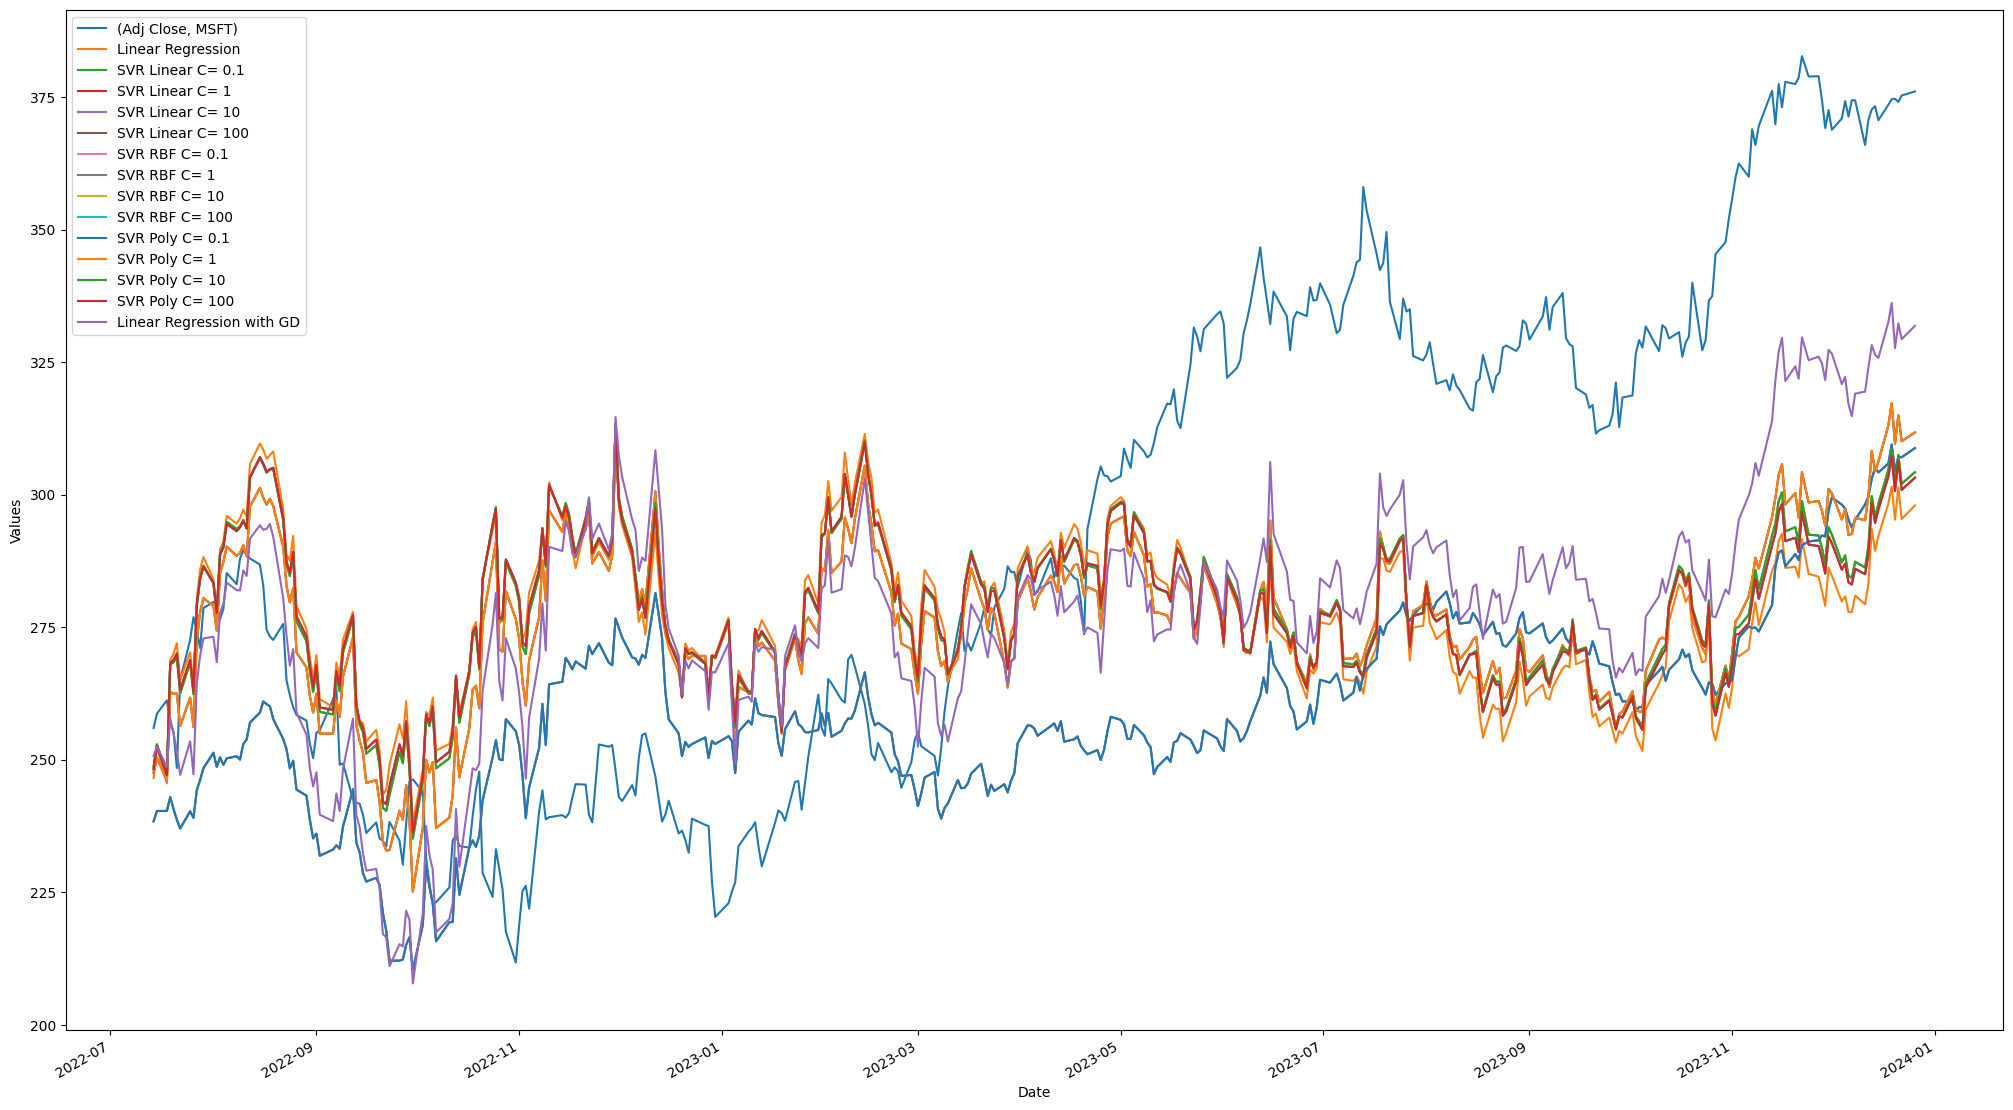



</details>

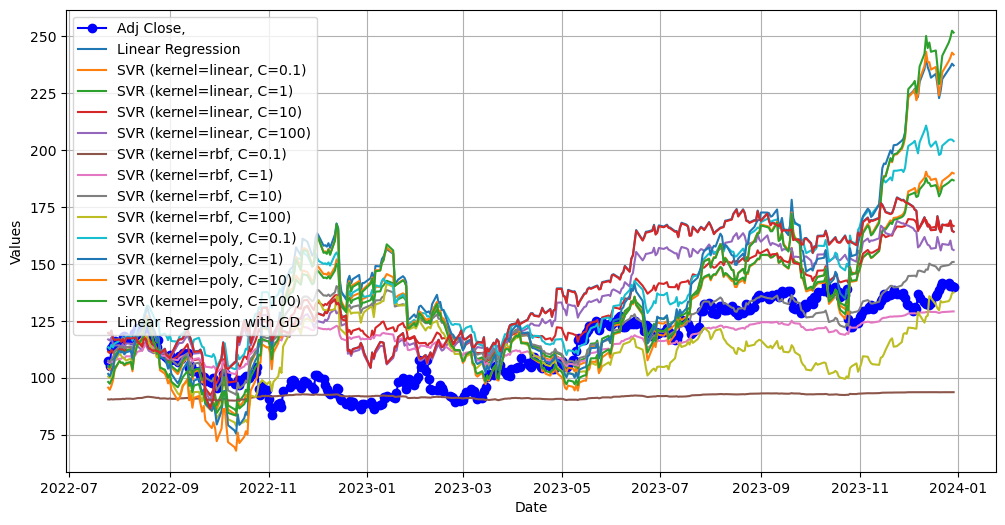

                Actual  Linear Regression  SVR (kernel=linear, C=0.1)  \
2022-07-25  107.510002         119.752630                  104.145001   
2022-07-26  105.019997         119.203055                  103.333188   
2022-07-27  113.059998         120.740730                  105.009939   
2022-07-28  114.220001         117.377518                  106.162810   
2022-07-29  116.320000         116.779713                  109.452319   
...                ...                ...                         ...   
2023-12-22  141.490005         167.315851                  186.440642   
2023-12-26  141.520004         166.746160                  188.588474   
2023-12-27  140.369995         169.114863                  189.243972   
2023-12-28  140.229996         164.612438                  190.124871   
2023-12-29  139.690002         164.178471                  189.783342   

            SVR (kernel=linear, C=1)  SVR (kernel=linear, C=10)  \
2022-07-25                105.178831                 111

In [23]:
### START CODE HERE ###


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual'], label='Adj Close,', color='blue', marker='o')
for col in results.columns[1:]:
    plt.plot(results.index, results[col], label=col)
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Display the results DataFrame
print(results)
### END CODE HERE ###

### Question
1. Rank Top 3 Models with Best prediction (Best MSE)
2. What would be the reason for large error from 2023-05 to 2024-01? 

In [24]:
# Ans 1
# SVR Linear C =1
# SVR Linear C =10
# SVR Linear C =100
# Ans 2
# outlier